# 第1章 基礎

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 2)
from IPython.display import display, Audio
import soundfile as sf
import requests
import io


---

## 1. 音とは

<u>**A. 波**</u>

<br>

例えば

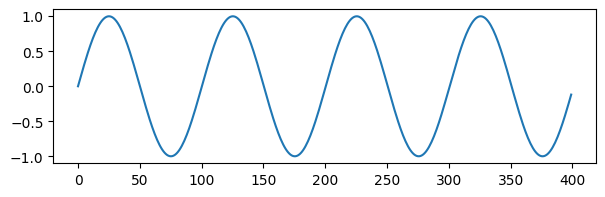

In [3]:
freq = 440
sr = 44100
sec = 1
amp = 1
y = amp * np.sin(np.linspace(0, 2*np.pi * freq * sec, sr*sec))
plt.plot(y[:400])
Audio(y, rate=sr)

こんな波だとこんな音になる



もう少し一般的な音声を聴いてみる
- [CS 101- Sample Sound Files](https://www2.cs.uic.edu/~i101/SoundFiles/)

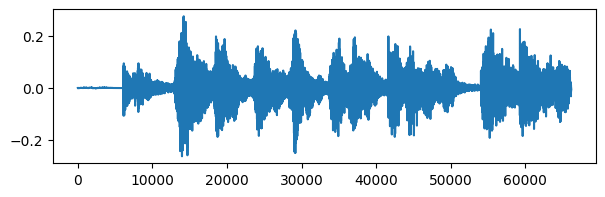

In [4]:
path = 'https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav'
res = requests.get(path)
br = io.BufferedReader(io.BytesIO(res.content))
y, sr = sf.read(br)
plt.plot(y)
Audio(y, rate=sr)

適当に拡大してみるとこんな感じ

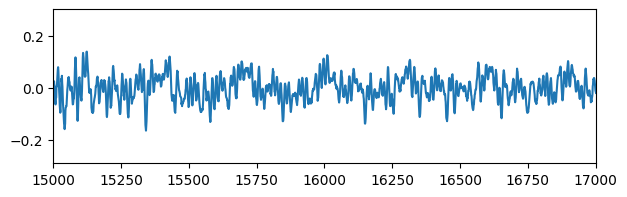

In [5]:
plt.plot(y)
plt.xlim(15000, 17000);

複雑だが波になっているのが分かる

**こんな風に、この世のありとあらゆる音は波で表現することが出来る**

## 2. 音と波の関係

音を波で表せることが分かった。では波と音にはどの様な関係があるのだろうか。

In [6]:
def flow(freq=440, sr=44100, sec=1, amp=1):
    y = amp * np.sin(np.linspace(0, 2*np.pi * freq * sec, sr*sec))
    plt.plot(y[:400])
    plt.ylim(-1.1, 1.1)
    plt.show()
    display(Audio(y, rate=sr, normalize=False))

### 1. 周波数

波が細かいと音が高くなる

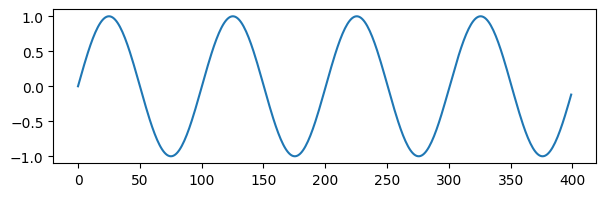

--------------------------------------------------------------------------------


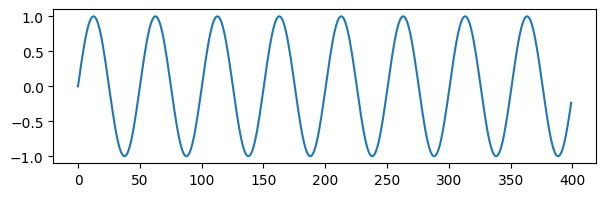

In [7]:
flow(440)
print('-'*80)
flow(880)

波の細かさを**周波数（frequency）** と呼ぶ。これは1秒間に振動した回数を表す。

また、周波数880Hzの音（下）は、440Hzの音（上）の1オクターブ上の音となる。「オクターブ」というのは「周波数の比率が1:2の関係」と定義される。

### 2. 音圧

波が大きいと音が大きくなる。

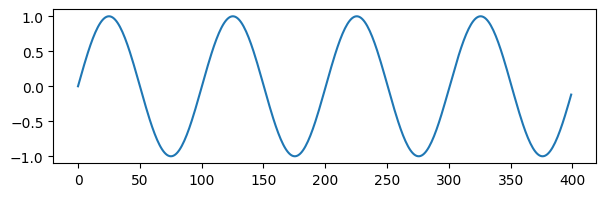

--------------------------------------------------------------------------------


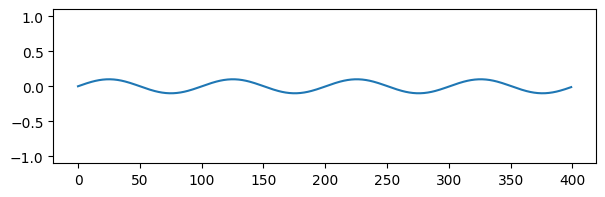

In [94]:
flow(amp=1)
print('-'*80)
flow(amp=0.1)

音の大きさは**音圧**と呼ぶ。圧力の単位はパスカル（Pa）で、音も同じ。ただ音の大きさは人間の聴覚に対して指数的なので、何らかの基準を元に対数をとったdB（デシベル）という単位で扱う。  
また音圧の最大値を**振幅**と呼ぶ。音声波形の縦軸を振幅と表すこともあるが、厳密には違うのかもしれない。

### 3. 音の合成

複数の音を表した波を足し合わせると、それらが混ざった音ができる。

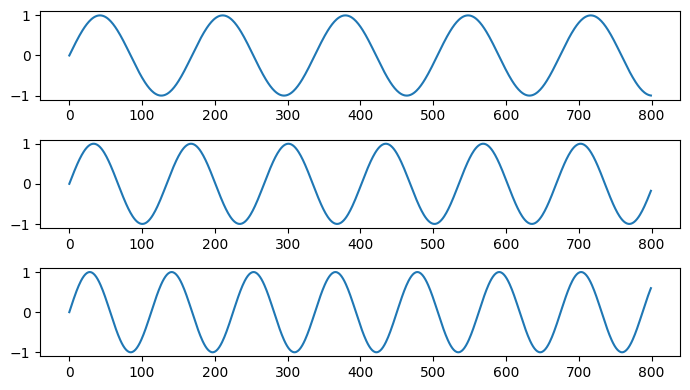

In [8]:
def sin_wave_from_midi(num, sr=44100, amp=1, sec=1):
    freq = 2**((num-69)/12)*440
    t = np.arange(0, sec, 1/sr)
    return amp * np.sin(2*np.pi*freq*t)

sr = 44100
y1 = sin_wave_from_midi(60, sr=sr)
y2 = sin_wave_from_midi(64, sr=sr)
y3 = sin_wave_from_midi(67, sr=sr)

plt.figure(figsize=(7, 4))
for i in range(1, 4):
    plt.subplot(3, 1, i)
    exec(f'plt.plot(y{i}[:800])')
plt.tight_layout()

display(Audio(y1, rate=sr))
display(Audio(y2, rate=sr))
display(Audio(y3, rate=sr))

これらを足す

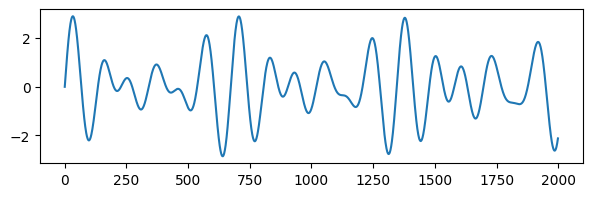

In [9]:
y = y1 + y2 + y3
plt.plot(y[:2000])
Audio(y, rate=sr)

3つの音が混ざった音が出来た

<br>

ここでちょっとした雑学。ノイズキャンセリングのお話。

まず2つの音を用意する。

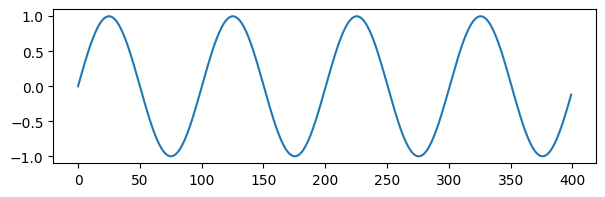

--------------------------------------------------------------------------------


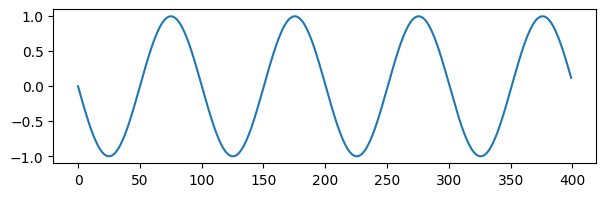

In [108]:
freq, sr, sec, amp = 440, 44100, 1, 1
t = np.arange(0, 1, 1/sr)
y1 = amp * np.sin(2*np.pi*freq*t)
plt.plot(y1[:400])
plt.show()
display(Audio(y1, rate=sr))

print('-'*80)

y2 = amp * np.sin(2*np.pi*freq*t + np.pi)
plt.plot(y2[:400])
plt.show()
display(Audio(y2, rate=sr))

2つの音を用意した。周波数は同じ。ではこの2つを足すとどうなるか。

In [104]:
y = y1 + y2
Audio(y, rate=sr, normalize=False)

何も聞こえない。波形を見てみよう。

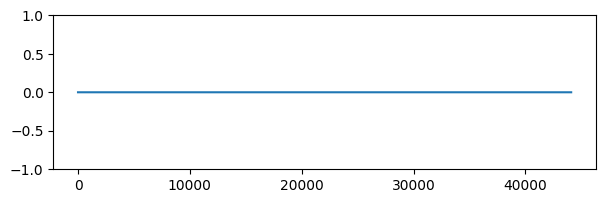

In [106]:
plt.plot(y)
plt.ylim(-1, 1);

実は先程の2つの波形は位相が半分($\pi$)だけずれている。これは**逆位相**といい、2つを足すとちょうど0になる。  
これを活用したのがノイズキャンセリング。入ってきた高周波数の音（ノイズ）の逆位相の音をぶつけることで、ノイズを打ち消している。

実際にやってみる

In [14]:
def sin_wave_from_midi(num, sr=44100, amp=1, sec=1):
    freq = 2**((num-69)/12)*440
    t = np.arange(0, sec, 1/sr)
    return amp * np.sin(2*np.pi*freq*t)

sr = 44100
y1 = sin_wave_from_midi(60, sr=sr)
y2 = sin_wave_from_midi(64, sr=sr)
y3 = sin_wave_from_midi(67, sr=sr)

y = y1 + y2 + y3
Audio(y, rate=sr)

周波数の異なる3つの音を足した。

で、次に1番高い音の逆位相の音を作る。

In [15]:
num = 67
freq = 2**((num-69)/12)*440
y3_ = np.sin(2*np.pi*freq*t + np.pi)
Audio(y3_, rate=sr)

足してみると

In [16]:
y = y + y3_
Audio(y, rate=sr)

1番上の音を消すことが出来た


---

## 3. コンピュータで音を扱う

音をコンピュータで扱うには、音を数値化（デジタル化）する必要がある。  
音は波で表せるので、波を数値化すれば良さそう。

一つ目の様な波であれば数式として表せそうだが、二つ目の様な複雑な波形は難しそう  
→ 波を離散化して、一次元の配列として表す

### 音を作る

実際に音を作ってみる。グラフで表したときに波になるような配列を作ればいい。

<br>

先程のsin波の生成を関数化

In [95]:
def sin_wave(freq, sr=44100, amp=1, sec=1):
    t = np.arange(0, sec, 1/sr) # 時間軸の生成
    return amp * np.sin(2 * np.pi * freq * t) # sin波を生成

離散化の細かさをサンプリングレートと呼ぶ。44100を使うことが多い。

- freq: 周波数
- sr: サンプリングレート
- amp: 振幅
- sec: 音の長さ(秒)

適当な周波数を入れてsin波を作ってみる

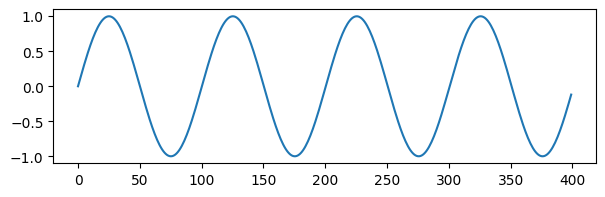

In [67]:
freq = 440 # 周波数
sr = 44100 # サンプリングレート
y = sin_wave(freq=freq, sr=sr)
plt.plot(y[:400])
Audio(y, rate=sr)

周波数を2倍にした結果、音が高くなった。波の細かさと音の高さは比例する。  

そして周波数を2倍にしたこの音は、元の音の1オクターブ上の音となっている。  
オクターブというのは、「周波数の比率が2:1の関係」と定義できる。

### モノラルとステレオ

2つのスピーカーで**同じ音**を鳴らす：**モノラル**  
2つのスピーカーで**違う音**を鳴らす：**ステレオ**

ステレオの場合、2次元の配列で表す必要がある。

<br>

2つの音を作った

In [2]:
from scipy import signal

In [18]:
sec = 2
t = np.linspace(0, sec, sr*sec)
L = signal.chirp(t, 0, sec, 880)
R = np.flip(L)
display(Audio(L, rate=sr))
display(Audio(R, rate=sr))

これを合成して一つの音源にするのがモノラル  
モノラルでは左右のスピーカーで同じ音を鳴らしている

In [ ]:
y = L + R
Audio(y, rate=sr)

左右に分けて再生するのがステレオ

In [ ]:
Audio((L, R), rate=sr)

### チップチューン (おまけ)

ファミコン音楽を作ってみよう

<br>

ファミコンでは3種類の音源チップから音を鳴らしていた (3種類の音しか鳴らせなかった)  
この3種類という制限で作られた音楽をチップチューンというらしい

**参考**  
[Pythonでゲーム音楽（チップチューン）の基本波形を生成（サイン波，矩形波，のこぎり波，三角波，白色雑音） - Wizard Notes](https://www.wizard-notes.com/entry/python/basic-waveforms)

<br>

チップチューンで使われる3種類の音は以下の3つ

#### 矩形波

矩形波 (くけいは)
方形波ともいうらしい

[scipy.signal.square — SciPy v1.8.0 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html)

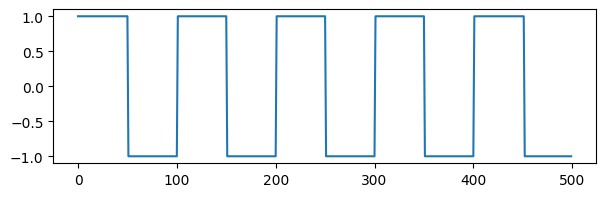

In [22]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = signal.square(2*np.pi*freq*t)
plt.plot(y[:500])
Audio(y, rate=sr)

#### 三角波

[scipy.signal.sawtooth — SciPy v1.8.0 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html)

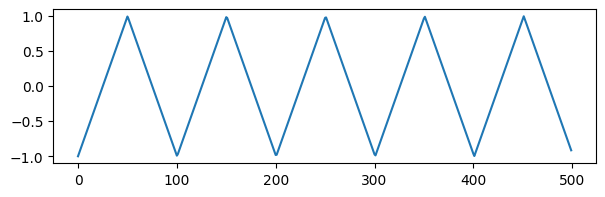

In [24]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = signal.sawtooth(2*np.pi*freq*t, 0.5)
plt.plot(y[:500])
Audio(y, rate=sr)

#### ホワイトノイズ

正規分布に従って配列を作るとホワイトノイズになるらしい

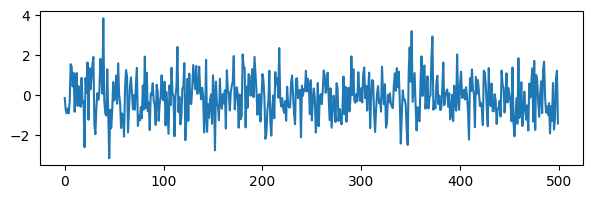

In [25]:
sr, sec = 44100, 1
y = np.random.randn(sr*sec)
plt.plot(y[:500])
Audio(y, rate=sr)

#### 音楽を作ろう

midiファイルから音符の情報を読み取って音楽を作ろう

**使用ライブラリ**
- [music21](https://web.mit.edu/music21/doc/)
- [munotes](https://github.com/misya11p/munotes)

In [16]:
import music21 as m21
import munotes as mn

In [20]:
path = 'midi/jokyoku.mid'
song = m21.converter.parse(path)

stream = mn.Stream([])
for part in song:
    if isinstance(part, m21.metadata.Metadata):
        continue
    track = mn.Track([], unit='ql', bpm=120)
    for event in part.flat:
        if not isinstance(event, m21.note.GeneralNote):
            continue

        ql = event.quarterLength
        if isinstance(event, m21.note.Rest):
            track.append((mn.Rest(), ql))
        else:
            notes = mn.Notes(*[note.midi for note in event.pitches])
            track.append((notes, ql))

    stream.append(track)

In [22]:
stream.play(['square', 'square', 'sawtooth'])


---

## 2. Pythonで音を扱う

Pythonで音を扱う際に必要な知識をざっくりと

### 音声埋め込み
ipython notebook形式(.ipynb)での音声埋め込み  
→`IPython.display.Audio()`を使用

[Module: display — IPython 8.1.0 documentation](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

In [ ]:
from IPython.display import display
from IPython.display import Audio

`display()`に引数としてAudioオブジェクトを与えることで埋め込みができる  

<br>

音声ファイルの場合 : pathを入力

In [ ]:
path = 'sample-sounds/ohayo.wav'
display(Audio(path))

最後に置かれたオブジェクトは勝手に表示されるのでAudioだけでもいい

In [ ]:
Audio(path)

web上のファイルも可

In [ ]:
Audio('http://pro-video.jp/voice/announce/mp3/ohayo01mayu.mp3')

配列の場合 : numpy配列(np.ndarray)とサンプリングレートを入力

In [ ]:
sr = 44100
y = sin_wave(freq=440, sr=sr)
Audio(y, rate=sr)

`normalize=True`とすると正規化された状態で埋め込まれる。  
デフォルトでTrueになっているため、音量を変更したい場合はFalseと示す必要がある  
(`normalize=False`とする場合、配列の値は-1 ~ 1に収まっている必要がある)

**\*GoogleColabだとIPythonのバージョンが古いのでできません（2022/03）**

In [ ]:
# 音量を 1/10 にする
y *= 0.1
Audio(y, rate=sr, normalize=False)

#### VScodeでの埋め込み

対応していないようです。が、音を再生するだけならできないこともない。

[VSCodeのJupyterでIPython.display.Audio() を使いたい - Qiita](https://qiita.com/miya_ppp/items/31d4358036c9bd1485a9)

### 音声読み込み

音声ファイルをnumpy配列として読み込む  
これをしないと分析ができない

#### soundfile
音声ファイルの読み書きができる。対応している形式などは以下参照。mp3は対応していないので注意。

[SoundFile — PySoundFile 0.10.3post1-1-g0394588 documentation](https://pysoundfile.readthedocs.io/en/latest/)

In [ ]:
import soundfile as sf

配列とサンプリングレートが返される

In [ ]:
path = './sample-sounds/shiningstar.wav'
y, sr = sf.read(path)
print(sr)
y

44100


array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.05175781e-05],
       ...,
       [-6.10351562e-05,  3.05175781e-05],
       [ 9.15527344e-05,  0.00000000e+00],
       [-9.15527344e-05,  0.00000000e+00]])

ステレオ音源の場合、2次元の配列が返される (信号長, チャンネル数)

<br>

`IPython.display.Audio()`で埋め込む配列は、1次元もしくは形状が(チャンネル数, 信号長)の配列でないといけないので、2次元以上の配列をsfで読み込んだ場合は転置が必要

In [ ]:
Audio(y.T, rate=sr)

<br>

#### librosa
いろんな音声解析ができる。音声ファイルの読み書きもできる。こちらもmp3非対応。

[librosa — librosa 0.9.1 documentation](https://librosa.org/doc/latest/index.html)  
[librosa.load —librosa0.9.1ドキュメント](https://librosa.org/doc/latest/generated/librosa.load.html#librosa.load)

In [ ]:
import librosa

sf同様、配列とsrが返される  
返されるsrは、デフォルトでは22050になっており、配列もそれに従ったものが返される

In [ ]:
y, sr = librosa.load(path)
sr

22050

元のファイルのsrに従いたい場合は`sr=None`を記述

In [ ]:
y, sr = librosa.load(path, sr=None)
print(sr)
y

44100


array([ 0.0000000e+00,  0.0000000e+00, -1.5258789e-05, ...,
       -1.5258789e-05,  4.5776367e-05, -4.5776367e-05], dtype=float32)

任意のsrで読み込むこともできる

In [ ]:
sr = 48000
y, _ = librosa.load(path, sr=sr)
y, sr

(array([ 5.4415727e-06, -2.8204747e-06, -1.4639322e-05, ...,
         2.4039353e-05, -6.4049495e-06,  0.0000000e+00], dtype=float32),
 48000)

`mono=True`でモノラル音源としての読み込みが可能 (デフォルト：True)

In [ ]:
y, sr = librosa.load(path, mono=True)
print(y.shape)

y, sr = librosa.load(path, mono=False)
print(y.shape)

(270143,)
(2, 270143)


<br>

#### audiofile

様々なフォーマットに対応したライブラリ。使い方はsfと同じ

[audiofile — audiofile Documentation](https://audeering.github.io/audiofile/api.html)

In [ ]:
import audiofile

In [ ]:
y, sr = audiofile.read(path)
print(sr)
print(y.shape)
y

44100
(2, 540286)


array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -6.1035156e-05,  9.1552734e-05, -9.1552734e-05],
       [ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
         3.0517578e-05,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

mp3も対応

**Q. 結局どれ使えばいいの？**  
- 困ったらsf
- 解析を行う場合は一次元になっていた方が楽なのでlibrosa
- mp3を読み込みたい場合はaudiofile